In [1]:
import os
import pandas as pd
import numpy as np
from itertools import repeat
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm #Import svm model
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [9]:
#A function to convert Hexadecimal into decimal
def data_converter(data):
    output_df = pd.DataFrame()
    output_df["Hanldes"] = data[0] +" "+ data[1] +" " +data[2] +" "+ data[3] + data[4]
    output_df["Timestamps"] = data[6] + data[5]
    output_df["ACC_X"] = data[8] + data[7]
    output_df["ACC_Y"] = data[10] + data[9]
    output_df["ACC_Z"] = data[12] + data[11]
    output_df["GYR_X"] = data[14] + data[13]
    output_df["GYR_Y"] = data[16] + data[15]
    output_df["GYR_Z"] = data[18] + data[17]
    output_df["MAG_X"] = data[20] + data[19]
    output_df["MAG_Y"] = data[22] + data[21]
    output_df["MAG_Z"] = data[24] + data[23]
    output_df["Timestamps"]  = [int(x, 16)/100 for x in  output_df["Timestamps"]]
    output_df["ACC_X"] = [int(x, 16) if int(x, 16) <5000 else int(x,16)- 65536 for x in  output_df["ACC_X"]]
    output_df["ACC_Y"] = [int(x, 16) if int(x, 16) <5000 else int(x,16)- 65536  for x in  output_df["ACC_Y"]]
    output_df["ACC_Z"] = [int(x, 16) if int(x, 16) <5000 else int(x,16)- 65536 for x in  output_df["ACC_Z"]]
    output_df["GYR_X"] = [int(x, 16) if int(x, 16) <5000 else int(x,16)- 65536 for x in  output_df["GYR_X"]]
    output_df["GYR_Y"] = [int(x, 16) if int(x, 16) <5000 else int(x,16)- 65536  for x in  output_df["GYR_Y"]]
    output_df["GYR_Z"] = [int(x, 16) if int(x, 16) <5000 else int(x,16)- 65536  for x in  output_df["GYR_Z"]]
    output_df["MAG_X"] = [int(x, 16) if int(x, 16) <5000 else int(x,16)- 65536 for x in  output_df["MAG_X"]]
    output_df["MAG_Y"] = [int(x, 16) if int(x, 16) <5000 else int(x,16)- 65536 for x in  output_df["MAG_Y"]]
    output_df["MAG_Z"] = [int(x, 16) if int(x, 16) <5000 else int(x,16)- 65536  for x in  output_df["MAG_Z"]]
    return output_df


In [ ]:
tmp_ = pd.read_csv("./01.txt", sep=" ", skiprows=1, header = None, dtype=str)

In [ ]:
tmp_ = data_converter(tmp_)

In [ ]:
tmp_

,Hanldes,Timestamps,ACC_X,ACC_Y,ACC_Z,GYR_X,GYR_Y,GYR_Z,MAG_X,MAG_Y,MAG_Z
0,Notification handle = 0x0011value:,501.35,341,-50,960,9,-23,-1,537,278,-1403
1,Notification handle = 0x0011value:,501.42,347,-48,949,9,-24,-2,543,275,-1408
2,Notification handle = 0x0011value:,501.48,348,-51,957,9,-25,-1,543,287,-1411
3,Notification handle = 0x0011value:,501.54,346,-48,957,9,-25,-1,538,277,-1409
4,Notification handle = 0x0011value:,501.60,348,-49,955,9,-25,-2,550,281,-1406
...,...,...,...,...,...,...,...,...,...,...,...
1474,Notification handle = 0x0011value:,593.48,321,-8,964,9,-25,-1,448,434,-1190
1475,Notification handle = 0x0011value:,593.54,323,-9,965,9,-25,-1,444,431,-1183
1476,Notification handle = 0x0011value:,593.60,320,-8,964,9,-25,-2,438,433,-1181
1477,Notification handle = 0x0011value:,593.67,319,-8,964,9,-25,-2,438,430,-1183


Text(0, 0.5, 'Intensity')

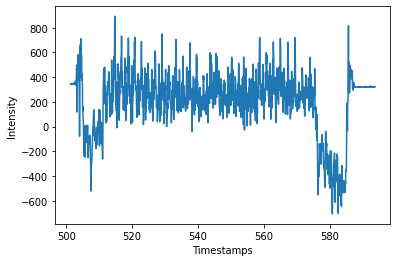

In [ ]:
plt.plot(tmp_["Timestamps"], tmp_["ACC_X"])
plt.xlabel("Timestamps")
plt.ylabel("Intensity")

Text(0, 0.5, 'Intensity')

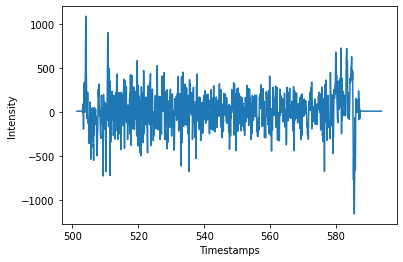

In [ ]:
plt.plot(tmp_["Timestamps"], tmp_["GYR_X"])
plt.xlabel("Timestamps")
plt.ylabel("Intensity")

In [10]:
imprp01 = pd.read_csv("./improper-form/imp_01.txt", sep=" ", skiprows=1, header = None, dtype=str)
imprp01 = data_converter(imprp01)
prp01 = pd.read_csv("./proper-form/01.txt", sep=" ", skiprows=1, header = None, dtype=str)
prp01 = data_converter(prp01)

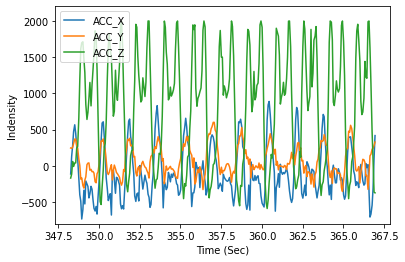

In [11]:
plt.plot(imprp01.iloc[200:500,[1]], imprp01.iloc[200:500,[2]], label="ACC_X")
plt.plot(imprp01.iloc[200:500,[1]], imprp01.iloc[200:500,[3]], label="ACC_Y")
plt.plot(imprp01.iloc[200:500,[1]], imprp01.iloc[200:500,[4]], label="ACC_Z")
plt.ylim([-800, 2200])
plt.xlabel("Time (Sec)")
plt.ylabel("Indensity")
plt.legend(loc=0)

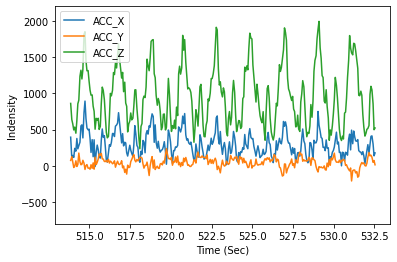

In [12]:
plt.plot(prp01.iloc[200:500,[1]], prp01.iloc[200:500,[2]], label="ACC_X")
plt.plot(prp01.iloc[200:500,[1]], prp01.iloc[200:500,[3]], label="ACC_Y")
plt.plot(prp01.iloc[200:500,[1]], prp01.iloc[200:500,[4]], label="ACC_Z")
plt.ylim([-800, 2200])
plt.xlabel("Time (Sec)")
plt.ylabel("Indensity")
plt.legend(loc=2)

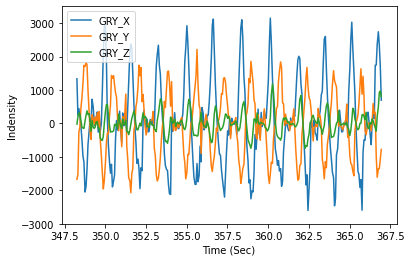

In [13]:
plt.plot(imprp01.iloc[200:500,[1]], imprp01.iloc[200:500,[5]], label="GRY_X")
plt.plot(imprp01.iloc[200:500,[1]], imprp01.iloc[200:500,[6]], label="GRY_Y")
plt.plot(imprp01.iloc[200:500,[1]], imprp01.iloc[200:500,[7]], label="GRY_Z")
plt.ylim([-3000, 3500])
plt.xlabel("Time (Sec)")
plt.ylabel("Indensity")
plt.legend(loc='best')

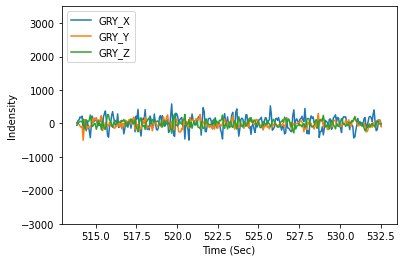

In [14]:
plt.plot(prp01.iloc[200:500,[1]], prp01.iloc[200:500,[5]], label="GRY_X")
plt.plot(prp01.iloc[200:500,[1]], prp01.iloc[200:500,[6]], label="GRY_Y")
plt.plot(prp01.iloc[200:500,[1]], prp01.iloc[200:500,[7]], label="GRY_Z")
plt.xlabel("Time (Sec)")
plt.ylabel("Indensity")
plt.ylim([-3000, 3500])
plt.legend(loc=2)

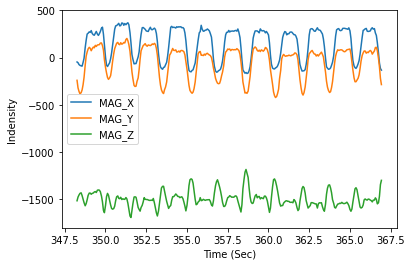

In [15]:
plt.plot(imprp01.iloc[200:500,[1]], imprp01.iloc[200:500,[8]], label="MAG_X")
plt.plot(imprp01.iloc[200:500,[1]], imprp01.iloc[200:500,[9]], label="MAG_Y")
plt.plot(imprp01.iloc[200:500,[1]], imprp01.iloc[200:500,[10]], label="MAG_Z")
plt.ylim([-1800, 500])
plt.xlabel("Time (Sec)")
plt.ylabel("Indensity")
plt.legend(loc=6)

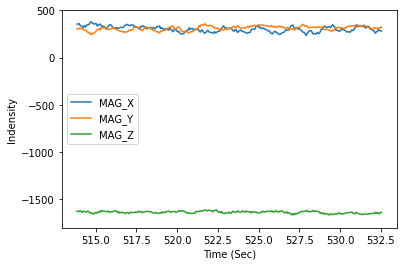

In [16]:
plt.plot(prp01.iloc[200:500,[1]], prp01.iloc[200:500,[8]], label="MAG_X")
plt.plot(prp01.iloc[200:500,[1]], prp01.iloc[200:500,[9]], label="MAG_Y")
plt.plot(prp01.iloc[200:500,[1]], prp01.iloc[200:500,[10]], label="MAG_Z")
plt.ylim([-1800, 500])
plt.xlabel("Time (Sec)")
plt.ylabel("Indensity")
plt.legend(loc=6)

In [ ]:
#Proper Mean
#Read from Ping's data
dir_path = "./proper_form"
ACC_X_AVG = list()
ACC_Y_AVG = list()
ACC_Z_AVG = list()
GYR_X_AVG = list()
GYR_Y_AVG = list()
GYR_Z_AVG = list()
MAG_X_AVG = list()
MAG_Y_AVG = list()
MAG_Z_AVG = list()

for root, d_names, f_names in os.walk(dir_path):
    for f in f_names:
        file_name = dir_path+ "/" +f
        print(file_name)
        tmp_input = pd.read_csv(file_name, sep=" ", skiprows=1, header = None, dtype=str)
        tmp_output = data_converter(tmp_input)
        tmp_size = np.shape(tmp_output)[0]
        for i in range(round((tmp_size-240)/120)):
            tmp_idx = (i+1)*120
            ACC_X_AVG.append(np.mean(tmp_output.iloc[tmp_idx:tmp_idx+120,[2]]))
            ACC_Y_AVG.append(np.mean(tmp_output.iloc[tmp_idx:tmp_idx+120,[3]]))
            ACC_Z_AVG.append(np.mean(tmp_output.iloc[tmp_idx:tmp_idx+120,[4]]))
            GYR_X_AVG.append(np.mean(tmp_output.iloc[tmp_idx:tmp_idx+120,[5]]))
            GYR_Y_AVG.append(np.mean(tmp_output.iloc[tmp_idx:tmp_idx+120,[6]]))
            GYR_Z_AVG.append(np.mean(tmp_output.iloc[tmp_idx:tmp_idx+120,[7]]))
            MAG_X_AVG.append(np.mean(tmp_output.iloc[tmp_idx:tmp_idx+120,[8]]))
            MAG_Y_AVG.append(np.mean(tmp_output.iloc[tmp_idx:tmp_idx+120,[9]]))
            MAG_Z_AVG.append(np.mean(tmp_output.iloc[tmp_idx:tmp_idx+120,[10]]))
#Append Austin's data
dir_path = "./Squat Data/proper_form"
for root, d_names, f_names in os.walk(dir_path):
    for f in f_names:
        file_name = dir_path+"/" +f
        if "Accelerometer" in f:
            tmp_acc = pd.read_csv(file_name, sep=",", skiprows=5, header = None, dtype=str)[[5,6,7]]
            print(file_name)
            tmp_size = np.shape(tmp_acc)[0]
            print(tmp_size)
            for i in range(round((tmp_size-50)/50)):
                tmp_idx = (i+1)*50
                ACC_X_AVG.append(np.mean(tmp_acc[5][tmp_idx:tmp_idx+50].astype(float)))
                ACC_Y_AVG.append(np.mean(tmp_acc[6][tmp_idx:tmp_idx+50].astype(float)))
                ACC_Z_AVG.append(np.mean(tmp_acc[7][tmp_idx:tmp_idx+50].astype(float)))
        elif "Gyroscope" in f:
            tmp_gyr = pd.read_csv(file_name, sep=",", skiprows=5, header = None, dtype=str)[[5,6,7]]
            tmp_size = np.shape(tmp_gyr)[0]
            for i in range(round((tmp_size-50)/50)):
                tmp_idx = (i+1)*50
                GYR_X_AVG.append(np.mean(tmp_gyr[5][tmp_idx:tmp_idx+50].astype(float)))
                GYR_Y_AVG.append(np.mean(tmp_gyr[6][tmp_idx:tmp_idx+50].astype(float)))
                GYR_Z_AVG.append(np.mean(tmp_gyr[7][tmp_idx:tmp_idx+50].astype(float)))
        elif "Magnetometer" in f:
            tmp_mag = pd.read_csv(file_name, sep=",", skiprows=5, header = None, dtype=str)[[5,6,7]]
            tmp_size = np.shape(tmp_mag)[0]
            for i in range(round((tmp_size-50)/50)):
                tmp_idx = (i+1)*50
                MAG_X_AVG.append(np.mean(tmp_gyr[5][tmp_idx:tmp_idx+50].astype(float)))
                MAG_Y_AVG.append(np.mean(tmp_gyr[6][tmp_idx:tmp_idx+50].astype(float)))
                MAG_Z_AVG.append(np.mean(tmp_gyr[7][tmp_idx:tmp_idx+50].astype(float)))            

proper_mean = pd.DataFrame(
    {'ACC_X_AVG': ACC_X_AVG,
     'ACC_Y_AVG': ACC_Y_AVG,
     'ACC_Z_AVG': ACC_Z_AVG,
     'GYR_X_AVG': GYR_X_AVG,
     'GYR_Y_AVG': GYR_Y_AVG,
     'GYR_Z_AVG': GYR_Z_AVG,
     'MAG_X_AVG': MAG_X_AVG,
     'MAG_Y_AVG': MAG_Y_AVG,
     'MAG_Z_AVG': MAG_Z_AVG
    })       
proper_mean = proper_mean.astype(float)

./proper_form/10.txt
./proper_form/04.txt
./proper_form/07.txt
./proper_form/09.txt
./proper_form/08.txt
./proper_form/01.txt
./proper_form/06.txt
./proper_form/05.txt
./proper_form/02.txt
./proper_form/03.txt
./Squat Data/proper_form/20211105_120935_Accelerometer copy.csv
342
./Squat Data/proper_form/20211105_123110_Accelerometer copy 3.csv
337
./Squat Data/proper_form/20211105_120935_Accelerometer copy 3.csv
337
./Squat Data/proper_form/20211105_120935_Accelerometer copy 2.csv
379
./Squat Data/proper_form/20211105_120935_Accelerometer copy 4.csv
339
./Squat Data/proper_form/20211105_123110_Accelerometer copy 2.csv
338
./Squat Data/proper_form/20211105_120935_Accelerometer.csv
351
./Squat Data/proper_form/20211105_123110_Accelerometer copy 4.csv
417
./Squat Data/proper_form/20211105_123110_Accelerometer.csv
311
./Squat Data/proper_form/20211105_123110_Accelerometer copy.csv
399


In [ ]:
np.shape(proper_mean)

(142, 9)

[Text(0, 0, 'ACC_X_AVG'),
 Text(0, 0, 'ACC_Y_AVG'),
 Text(0, 0, 'ACC_Z_AVG'),
 Text(0, 0, 'GYR_X_AVG'),
 Text(0, 0, 'GYR_Y_AVG'),
 Text(0, 0, 'GYR_Z_AVG'),
 Text(0, 0, 'MAG_X_AVG'),
 Text(0, 0, 'MAG_Y_AVG'),
 Text(0, 0, 'MAG_Z_AVG')]

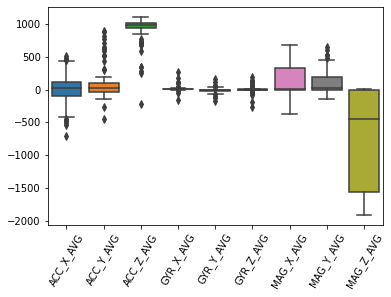

In [ ]:
proper_mean_plt = sns.boxplot(data=proper_mean)
proper_mean_plt.set_xticklabels(proper_mean_plt.get_xticklabels(),rotation=60)

In [ ]:
#Proper range
dir_path = "./proper_form"
ACC_X_Range = list()
ACC_Y_Range = list()
ACC_Z_Range = list()
GYR_X_Range = list()
GYR_Y_Range = list()
GYR_Z_Range = list()
MAG_X_Range = list()
MAG_Y_Range = list()
MAG_Z_Range = list()
#print(os.walk(dir_path))
for root, d_names, f_names in os.walk(dir_path):
    for f in f_names:
        file_name = dir_path+"/" +f
        tmp_input = pd.read_csv(file_name, sep=" ", skiprows=1, header = None, dtype=str)
        tmp_output = data_converter(tmp_input)
        tmp_size = np.shape(tmp_output)[0]
        for i in range(round((tmp_size-240)/120)):
            tmp_idx = (i+1)*120
            ACC_X_Range.append(np.max(tmp_output.iloc[tmp_idx:tmp_idx+120,[2]])-np.min(tmp_output.iloc[tmp_idx:tmp_idx+120,[2]]))
            ACC_Y_Range.append(np.max(tmp_output.iloc[tmp_idx:tmp_idx+120,[3]])-np.min(tmp_output.iloc[tmp_idx:tmp_idx+120,[3]]))
            ACC_Z_Range.append(np.max(tmp_output.iloc[tmp_idx:tmp_idx+120,[4]])-np.min(tmp_output.iloc[tmp_idx:tmp_idx+120,[4]]))
            GYR_X_Range.append(np.max(tmp_output.iloc[tmp_idx:tmp_idx+120,[5]])-np.min(tmp_output.iloc[tmp_idx:tmp_idx+120,[5]]))
            GYR_Y_Range.append(np.max(tmp_output.iloc[tmp_idx:tmp_idx+120,[6]])-np.min(tmp_output.iloc[tmp_idx:tmp_idx+120,[6]]))
            GYR_Z_Range.append(np.max(tmp_output.iloc[tmp_idx:tmp_idx+120,[7]])-np.min(tmp_output.iloc[tmp_idx:tmp_idx+120,[7]]))
            MAG_X_Range.append(np.max(tmp_output.iloc[tmp_idx:tmp_idx+120,[8]])-np.min(tmp_output.iloc[tmp_idx:tmp_idx+120,[8]]))
            MAG_Y_Range.append(np.max(tmp_output.iloc[tmp_idx:tmp_idx+120,[9]])-np.min(tmp_output.iloc[tmp_idx:tmp_idx+120,[9]]))
            MAG_Z_Range.append(np.max(tmp_output.iloc[tmp_idx:tmp_idx+120,[10]])-np.min(tmp_output.iloc[tmp_idx:tmp_idx+120,[10]]))

#Append Austin's data
dir_path = "./Squat Data/proper_form/"
for root, d_names, f_names in os.walk(dir_path):
    for f in f_names:
        file_name = dir_path+ "/" +f
        #print(root+"\\"+f)
        if "Accelerometer" in f:
            tmp_acc = pd.read_csv(file_name, sep=",", skiprows=5, header = None, dtype=str)[[5,6,7]]
            tmp_size = np.shape(tmp_acc)[0]
            for i in range(round((tmp_size-50)/50)):
                tmp_idx = (i+1)*50
                ACC_X_Range.append(np.max(tmp_acc[5][tmp_idx:tmp_idx+50].astype(float))-np.min(tmp_acc[5][tmp_idx:tmp_idx+50].astype(float)))
                ACC_Y_Range.append(np.max(tmp_acc[6][tmp_idx:tmp_idx+50].astype(float))-np.min(tmp_acc[6][tmp_idx:tmp_idx+50].astype(float)))
                ACC_Z_Range.append(np.max(tmp_acc[7][tmp_idx:tmp_idx+50].astype(float))-np.min(tmp_acc[7][tmp_idx:tmp_idx+50].astype(float)))
        elif "Gyroscope" in f:
            tmp_gyr = pd.read_csv(file_name, sep=",", skiprows=5, header = None, dtype=str)[[5,6,7]]
            tmp_size = np.shape(tmp_gyr)[0]
            for i in range(round((tmp_size-50)/50)):
                tmp_idx = (i+1)*50
                GYR_X_Range.append(np.max(tmp_gyr[5][tmp_idx:tmp_idx+50].astype(float))-np.min(tmp_gyr[5][tmp_idx:tmp_idx+50].astype(float)))
                GYR_Y_Range.append(np.max(tmp_gyr[6][tmp_idx:tmp_idx+50].astype(float))-np.min(tmp_gyr[6][tmp_idx:tmp_idx+50].astype(float)))
                GYR_Z_Range.append(np.max(tmp_gyr[7][tmp_idx:tmp_idx+50].astype(float))-np.min(tmp_gyr[7][tmp_idx:tmp_idx+50].astype(float)))
        elif "Magnetometer" in f:
            tmp_mag = pd.read_csv(file_name, sep=",", skiprows=5, header = None, dtype=str)[[5,6,7]]
            tmp_size = np.shape(tmp_mag)[0]
            for i in range(round((tmp_size-50)/50)):
                tmp_idx = (i+1)*50                
                MAG_X_Range.append(np.max(tmp_gyr[5][tmp_idx:tmp_idx+50].astype(float))-np.min(tmp_gyr[5][tmp_idx:tmp_idx+50].astype(float)))
                MAG_Y_Range.append(np.max(tmp_gyr[6][tmp_idx:tmp_idx+50].astype(float))-np.min(tmp_gyr[6][tmp_idx:tmp_idx+50].astype(float)))
                MAG_Z_Range.append(np.max(tmp_gyr[7][tmp_idx:tmp_idx+50].astype(float))-np.min(tmp_gyr[7][tmp_idx:tmp_idx+50].astype(float)))
            
            
proper_range = pd.DataFrame(
    {'ACC_X_Range': ACC_X_Range,
     'ACC_Y_Range': ACC_Y_Range,
     'ACC_Z_Range': ACC_Z_Range,
     'GYR_X_Range': GYR_X_Range,
     'GYR_Y_Range': GYR_Y_Range,
     'GYR_Z_Range': GYR_Z_Range,
     'MAG_X_Range': MAG_X_Range,
     'MAG_Y_Range': MAG_Y_Range,
     'MAG_Z_Range': MAG_Z_Range
    })       
proper_range = proper_range.astype(float)

In [ ]:
np.shape(proper_range)

(142, 9)

[Text(0, 0, 'ACC_X_Range'),
 Text(0, 0, 'ACC_Y_Range'),
 Text(0, 0, 'ACC_Z_Range'),
 Text(0, 0, 'GYR_X_Range'),
 Text(0, 0, 'GYR_Y_Range'),
 Text(0, 0, 'GYR_Z_Range'),
 Text(0, 0, 'MAG_X_Range'),
 Text(0, 0, 'MAG_Y_Range'),
 Text(0, 0, 'MAG_Z_Range')]

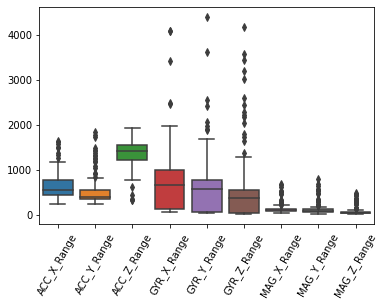

In [ ]:
proper_range_plt = sns.boxplot(data=proper_range)
proper_range_plt.set_xticklabels(proper_range_plt.get_xticklabels(),rotation=60)

In [ ]:
proper_df = pd.concat([proper_mean, proper_range], axis=1)

In [ ]:
np.shape(proper_df)

(142, 18)

In [ ]:
#improper Mean
dir_path = "./improper_form"
ACC_X_AVG = list()
ACC_Y_AVG = list()
ACC_Z_AVG = list()
GYR_X_AVG = list()
GYR_Y_AVG = list()
GYR_Z_AVG = list()
MAG_X_AVG = list()
MAG_Y_AVG = list()
MAG_Z_AVG = list()
#print(os.walk(dir_path))
for root, d_names, f_names in os.walk(dir_path):
    for f in f_names:
        file_name = dir_path+"/" +f
        tmp_input = pd.read_csv(file_name, sep=" ", skiprows=1, header = None, dtype=str)
        tmp_output = data_converter(tmp_input)
        tmp_size = np.shape(tmp_output)[0]
        for i in range(round((tmp_size-240)/120)):
            tmp_idx = (i+1)*120
            ACC_X_AVG.append(np.mean(tmp_output.iloc[tmp_idx:tmp_idx+120,[2]]))
            ACC_Y_AVG.append(np.mean(tmp_output.iloc[tmp_idx:tmp_idx+120,[3]]))
            ACC_Z_AVG.append(np.mean(tmp_output.iloc[tmp_idx:tmp_idx+120,[4]]))
            GYR_X_AVG.append(np.mean(tmp_output.iloc[tmp_idx:tmp_idx+120,[5]]))
            GYR_Y_AVG.append(np.mean(tmp_output.iloc[tmp_idx:tmp_idx+120,[6]]))
            GYR_Z_AVG.append(np.mean(tmp_output.iloc[tmp_idx:tmp_idx+120,[7]]))
            MAG_X_AVG.append(np.mean(tmp_output.iloc[tmp_idx:tmp_idx+120,[8]]))
            MAG_Y_AVG.append(np.mean(tmp_output.iloc[tmp_idx:tmp_idx+120,[9]]))
            MAG_Z_AVG.append(np.mean(tmp_output.iloc[tmp_idx:tmp_idx+120,[10]]))
            
#Add Austin's datain
dir_path = "./Squat Data/improper_form"
for root, d_names, f_names in os.walk(dir_path):
    for f in f_names:
        file_name = dir_path+"/" +f
        if "Accelerometer" in f:
            tmp_acc = pd.read_csv(file_name, sep=",", skiprows=5, header = None, dtype=str)[[5,6,7]]
            tmp_size = np.shape(tmp_acc)[0]
            print(tmp_size)
            for i in range(round((tmp_size-50)/50)):
                tmp_idx = (i+1)*50
                ACC_X_AVG.append(np.mean(tmp_acc[5][tmp_idx:tmp_idx+50].astype(float)))
                ACC_Y_AVG.append(np.mean(tmp_acc[6][tmp_idx:tmp_idx+50].astype(float)))
                ACC_Z_AVG.append(np.mean(tmp_acc[7][tmp_idx:tmp_idx+50].astype(float)))
        elif "Gyroscope" in f:
            tmp_gyr = pd.read_csv(file_name, sep=",", skiprows=5, header = None, dtype=str)[[5,6,7]]
            tmp_size = np.shape(tmp_gyr)[0]
            for i in range(round((tmp_size-50)/50)):
                tmp_idx = (i+1)*50
                GYR_X_AVG.append(np.mean(tmp_gyr[5][tmp_idx:tmp_idx+50].astype(float)))
                GYR_Y_AVG.append(np.mean(tmp_gyr[6][tmp_idx:tmp_idx+50].astype(float)))
                GYR_Z_AVG.append(np.mean(tmp_gyr[7][tmp_idx:tmp_idx+50].astype(float)))
        elif "Magnetometer" in f:
            tmp_mag = pd.read_csv(file_name, sep=",", skiprows=5, header = None, dtype=str)[[5,6,7]]
            tmp_size = np.shape(tmp_mag)[0]
            for i in range(round((tmp_size-50)/50)):
                tmp_idx = (i+1)*50
                MAG_X_AVG.append(np.mean(tmp_gyr[5][tmp_idx:tmp_idx+50].astype(float)))
                MAG_Y_AVG.append(np.mean(tmp_gyr[6][tmp_idx:tmp_idx+50].astype(float)))
                MAG_Z_AVG.append(np.mean(tmp_gyr[7][tmp_idx:tmp_idx+50].astype(float)))    

improper_mean = pd.DataFrame(
    {'ACC_X_AVG': ACC_X_AVG,
     'ACC_Y_AVG': ACC_Y_AVG,
     'ACC_Z_AVG': ACC_Z_AVG,
     'GYR_X_AVG': GYR_X_AVG,
     'GYR_Y_AVG': GYR_Y_AVG,
     'GYR_Z_AVG': GYR_Z_AVG,
     'MAG_X_AVG': MAG_X_AVG,
     'MAG_Y_AVG': MAG_Y_AVG,
     'MAG_Z_AVG': MAG_Z_AVG
    })       
improper_mean = improper_mean.astype(float)

312
252
290
229
235
239
380
285
235


In [ ]:
np.shape(improper_mean)

(92, 9)

In [ ]:
#improper range
dir_path = "./improper_form"
ACC_X_Range = list()
ACC_Y_Range = list()
ACC_Z_Range = list()
GYR_X_Range = list()
GYR_Y_Range = list()
GYR_Z_Range = list()
MAG_X_Range = list()
MAG_Y_Range = list()
MAG_Z_Range = list()
#print(os.walk(dir_path))
for root, d_names, f_names in os.walk(dir_path):
    for f in f_names:
        file_name = dir_path +"/"+f
        tmp_input = pd.read_csv(file_name, sep=" ", skiprows=1, header = None, dtype=str)
        tmp_output = data_converter(tmp_input)
        tmp_size = np.shape(tmp_output)[0]
        for i in range(round((tmp_size-240)/120)):
            tmp_idx = (i+1)*120
            ACC_X_Range.append(np.max(tmp_output.iloc[tmp_idx:tmp_idx+120,[2]])-np.min(tmp_output.iloc[tmp_idx:tmp_idx+120,[2]]))
            ACC_Y_Range.append(np.max(tmp_output.iloc[tmp_idx:tmp_idx+120,[3]])-np.min(tmp_output.iloc[tmp_idx:tmp_idx+120,[3]]))
            ACC_Z_Range.append(np.max(tmp_output.iloc[tmp_idx:tmp_idx+120,[4]])-np.min(tmp_output.iloc[tmp_idx:tmp_idx+120,[4]]))
            GYR_X_Range.append(np.max(tmp_output.iloc[tmp_idx:tmp_idx+120,[5]])-np.min(tmp_output.iloc[tmp_idx:tmp_idx+120,[5]]))
            GYR_Y_Range.append(np.max(tmp_output.iloc[tmp_idx:tmp_idx+120,[6]])-np.min(tmp_output.iloc[tmp_idx:tmp_idx+120,[6]]))
            GYR_Z_Range.append(np.max(tmp_output.iloc[tmp_idx:tmp_idx+120,[7]])-np.min(tmp_output.iloc[tmp_idx:tmp_idx+120,[7]]))
            MAG_X_Range.append(np.max(tmp_output.iloc[tmp_idx:tmp_idx+120,[8]])-np.min(tmp_output.iloc[tmp_idx:tmp_idx+120,[8]]))
            MAG_Y_Range.append(np.max(tmp_output.iloc[tmp_idx:tmp_idx+120,[9]])-np.min(tmp_output.iloc[tmp_idx:tmp_idx+120,[9]]))
            MAG_Z_Range.append(np.max(tmp_output.iloc[tmp_idx:tmp_idx+120,[10]])-np.min(tmp_output.iloc[tmp_idx:tmp_idx+120,[10]]))
print(len(ACC_X_Range))
#Add Austin's data in
dir_path = "./Squat Data/improper_form"
for root, d_names, f_names in os.walk(dir_path):
    for f in f_names:
        file_name = dir_path +"/"+f
        if "Accelerometer" in f:
            tmp_acc = pd.read_csv(file_name, sep=",", skiprows=5, header = None, dtype=str)[[5,6,7]]
            tmp_size = np.shape(tmp_acc)[0]
            print(tmp_size)
            for i in range(round((tmp_size-50)/50)):
                tmp_idx = (i+1)*50
                ACC_X_Range.append(np.max(tmp_acc[5][tmp_idx:tmp_idx+50].astype(float))-np.min(tmp_acc[5][tmp_idx:tmp_idx+50].astype(float)))
                ACC_Y_Range.append(np.max(tmp_acc[6][tmp_idx:tmp_idx+50].astype(float))-np.min(tmp_acc[6][tmp_idx:tmp_idx+50].astype(float)))
                ACC_Z_Range.append(np.max(tmp_acc[7][tmp_idx:tmp_idx+50].astype(float))-np.min(tmp_acc[7][tmp_idx:tmp_idx+50].astype(float)))
        elif "Gyroscope" in f:
            tmp_gyr = pd.read_csv(file_name, sep=",", skiprows=5, header = None, dtype=str)[[5,6,7]]
            tmp_size = np.shape(tmp_gyr)[0]
            for i in range(round((tmp_size-50)/50)):
                tmp_idx = (i+1)*50
                GYR_X_Range.append(np.max(tmp_gyr[5][tmp_idx:tmp_idx+50].astype(float))-np.min(tmp_gyr[5][tmp_idx:tmp_idx+50].astype(float)))
                GYR_Y_Range.append(np.max(tmp_gyr[6][tmp_idx:tmp_idx+50].astype(float))-np.min(tmp_gyr[6][tmp_idx:tmp_idx+50].astype(float)))
                GYR_Z_Range.append(np.max(tmp_gyr[7][tmp_idx:tmp_idx+50].astype(float))-np.min(tmp_gyr[7][tmp_idx:tmp_idx+50].astype(float)))
        elif "Magnetometer" in f:
            tmp_mag = pd.read_csv(file_name, sep=",", skiprows=5, header = None, dtype=str)[[5,6,7]]
            tmp_size = np.shape(tmp_mag)[0]
            for i in range(round((tmp_size-50)/50)):
                tmp_idx = (i+1)*50                
                MAG_X_Range.append(np.max(tmp_gyr[5][tmp_idx:tmp_idx+50].astype(float))-np.min(tmp_gyr[5][tmp_idx:tmp_idx+50].astype(float)))
                MAG_Y_Range.append(np.max(tmp_gyr[6][tmp_idx:tmp_idx+50].astype(float))-np.min(tmp_gyr[6][tmp_idx:tmp_idx+50].astype(float)))
                MAG_Z_Range.append(np.max(tmp_gyr[7][tmp_idx:tmp_idx+50].astype(float))-np.min(tmp_gyr[7][tmp_idx:tmp_idx+50].astype(float)))
            
            
improper_range = pd.DataFrame(
    {'ACC_X_Range': ACC_X_Range,
     'ACC_Y_Range': ACC_Y_Range,
     'ACC_Z_Range': ACC_Z_Range,
     'GYR_X_Range': GYR_X_Range,
     'GYR_Y_Range': GYR_Y_Range,
     'GYR_Z_Range': GYR_Z_Range,
     'MAG_X_Range': MAG_X_Range,
     'MAG_Y_Range': MAG_Y_Range,
     'MAG_Z_Range': MAG_Z_Range
    })       
improper_range = improper_range.astype(float)

50
312
252
290
229
235
239
380
285
235


In [ ]:
np.shape(improper_range)

(92, 9)

[Text(0, 0, 'ACC_X_Range'),
 Text(0, 0, 'ACC_Y_Range'),
 Text(0, 0, 'ACC_Z_Range'),
 Text(0, 0, 'GYR_X_Range'),
 Text(0, 0, 'GYR_Y_Range'),
 Text(0, 0, 'GYR_Z_Range'),
 Text(0, 0, 'MAG_X_Range'),
 Text(0, 0, 'MAG_Y_Range'),
 Text(0, 0, 'MAG_Z_Range')]

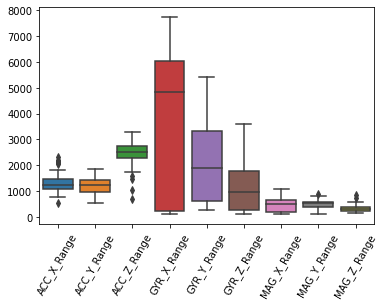

In [ ]:
improper_range_plt = sns.boxplot(data=improper_range)
improper_range_plt.set_xticklabels(improper_range_plt.get_xticklabels(),rotation=60)

[Text(0, 0, 'ACC_X_AVG'),
 Text(0, 0, 'ACC_Y_AVG'),
 Text(0, 0, 'ACC_Z_AVG'),
 Text(0, 0, 'GYR_X_AVG'),
 Text(0, 0, 'GYR_Y_AVG'),
 Text(0, 0, 'GYR_Z_AVG'),
 Text(0, 0, 'MAG_X_AVG'),
 Text(0, 0, 'MAG_Y_AVG'),
 Text(0, 0, 'MAG_Z_AVG')]

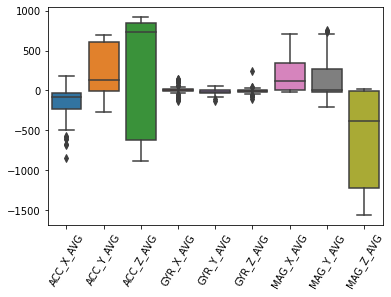

In [ ]:
improper_mean_plt = sns.boxplot(data=improper_mean)
improper_mean_plt.set_xticklabels(improper_mean_plt.get_xticklabels(),rotation=60)

In [ ]:
improper_df = pd.concat([improper_mean, improper_range], axis=1)

In [ ]:
np.shape(improper_df)

(92, 18)

In [ ]:
squats_df = pd.concat([proper_df, improper_df])

In [ ]:
squats_df.to_csv("squats_df.csv")

In [ ]:
squats_df = pd.read_csv("squats_df.csv")

In [ ]:
squats_df

,ACC_X_AVG,ACC_Y_AVG,ACC_Z_AVG,GYR_X_AVG,GYR_Y_AVG,GYR_Z_AVG,MAG_X_AVG,MAG_Y_AVG,MAG_Z_AVG,ACC_X_Range,ACC_Y_Range,ACC_Z_Range,GYR_X_Range,GYR_Y_Range,GYR_Z_Range,MAG_X_Range,MAG_Y_Range,MAG_Z_Range
0,185.583333,-18.958333,950.483333,27.266667,-58.358333,72.708333,395.025000,353.333333,-1617.291667,1156,632,1779,1628.0,1447.0,1292.0,255.0,300.0,114.0
1,325.641667,48.433333,973.483333,13.175000,-15.858333,10.375000,301.000000,303.883333,-1633.033333,717,372,1676,1082.0,530.0,573.0,103.0,98.0,39.0
2,269.791667,39.075000,982.941667,-1.200000,-19.800000,3.208333,291.525000,322.341667,-1638.133333,750,398,1644,961.0,550.0,525.0,115.0,74.0,49.0
3,273.175000,30.341667,947.275000,20.366667,-30.000000,-5.708333,311.491667,278.283333,-1664.150000,746,365,1695,1128.0,621.0,468.0,135.0,117.0,57.0
4,282.033333,41.025000,996.866667,7.041667,-31.416667,0.241667,313.700000,251.891667,-1674.533333,566,389,1704,643.0,618.0,578.0,109.0,153.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,-120.100000,597.680000,-677.240000,3.942000,-2.100000,-7.146000,3.942000,-2.100000,-7.146000,1043,1028,2430,220.4,626.8,285.4,220.4,626.8,285.4
234,-103.420000,581.000000,-657.200000,5.938000,1.428000,-1.066000,5.938000,1.428000,-1.066000,1077,1405,2682,204.0,623.0,249.8,204.0,623.0,249.8
235,-47.840000,583.320000,-650.700000,3.218000,13.384000,2.650000,3.218000,13.384000,2.650000,1090,889,2281,182.8,536.1,210.6,182.8,536.1,210.6
236,-79.520000,608.520000,-773.840000,3.842000,-7.572000,-2.246000,3.842000,-7.572000,-2.246000,1176,894,2186,119.9,504.9,195.5,119.9,504.9,195.5


In [ ]:
np.shape(squats_df)

(238, 18)

In [ ]:
y_train_sub0 = np.ones(142)
y_train_sub1 = np.zeros(96)
y_train_sub = np.concatenate([y_train_sub0, y_train_sub1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(squats_df, y_train_sub, test_size=0.2, random_state=42)

In [ ]:
np.shape(X_train)

(190, 18)

In [ ]:
np.shape(y_train)

(190,)

In [ ]:
#KNN
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[17  0]
 [ 2 29]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        17
         1.0       1.00      0.94      0.97        31

    accuracy                           0.96        48
   macro avg       0.95      0.97      0.96        48
weighted avg       0.96      0.96      0.96        48



In [ ]:
#Logistic Regression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)*100

97.91666666666666

In [ ]:
squats_df.columns

Index(['ACC_X_AVG', 'ACC_Y_AVG', 'ACC_Z_AVG', 'GYR_X_AVG', 'GYR_Y_AVG',
       'GYR_Z_AVG', 'MAG_X_AVG', 'MAG_Y_AVG', 'MAG_Z_AVG', 'ACC_X_Range',
       'ACC_Y_Range', 'ACC_Z_Range', 'GYR_X_Range', 'GYR_Y_Range',
       'GYR_Z_Range', 'MAG_X_Range', 'MAG_Y_Range', 'MAG_Z_Range'],
      dtype='object')

Feature: 0, Score: 0.00070
Feature: 1, Score: 0.00613
Feature: 2, Score: 0.02869
Feature: 3, Score: -0.00196
Feature: 4, Score: 0.00142
Feature: 5, Score: 0.00292
Feature: 6, Score: 0.00242
Feature: 7, Score: 0.00112
Feature: 8, Score: -0.00152
Feature: 9, Score: -0.00049
Feature: 10, Score: 0.00393
Feature: 11, Score: -0.00341
Feature: 12, Score: -0.01315
Feature: 13, Score: 0.00378
Feature: 14, Score: 0.01031
Feature: 15, Score: 0.00196
Feature: 16, Score: -0.00687
Feature: 17, Score: 0.00059


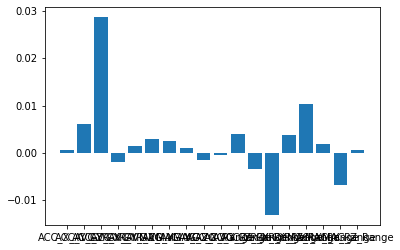

In [ ]:
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in squats_df.columns], importance)
plt.show()

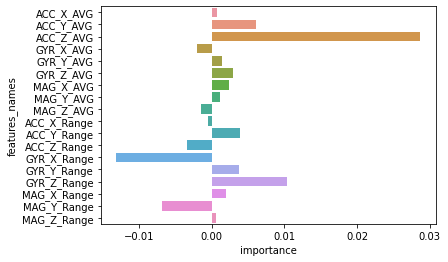

In [ ]:
lr_coef_df = pd.DataFrame(
    {'importance': clf.coef_[0],
     'features_names': squats_df.columns
    }) 
sns.barplot(x = 'importance',
            y = 'features_names',
            data = lr_coef_df)

In [ ]:
#Decision Trees
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 97.91666666666666


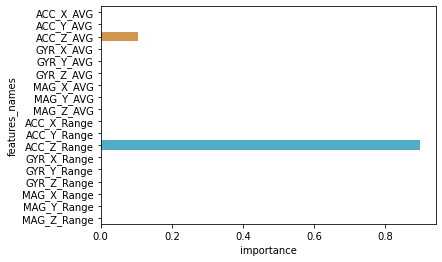

In [ ]:
lr_coef_df = pd.DataFrame(
    {'importance': clf.feature_importances_,
     'features_names': squats_df.columns
    }) 
sns.barplot(x = 'importance',
            y = 'features_names',
            data = lr_coef_df)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.10367
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.89633
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000


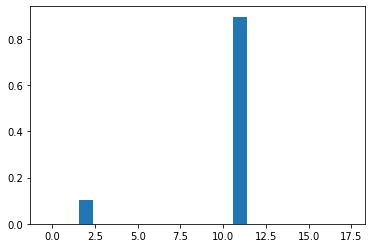

In [ ]:
# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
#Shown above, feature 11 is ACC_Z range

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 100.0


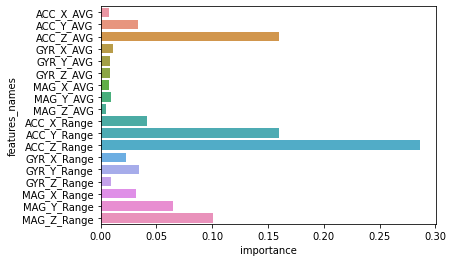

In [ ]:
lr_coef_df = pd.DataFrame(
    {'importance': clf.feature_importances_,
     'features_names': squats_df.columns
    }) 
sns.barplot(x = 'importance',
            y = 'features_names',
            data = lr_coef_df)

Feature: 0, Score: 0.01450
Feature: 1, Score: 0.01271
Feature: 2, Score: 0.19123
Feature: 3, Score: 0.00911
Feature: 4, Score: 0.00663
Feature: 5, Score: 0.01193
Feature: 6, Score: 0.01212
Feature: 7, Score: 0.01108
Feature: 8, Score: 0.00407
Feature: 9, Score: 0.05541
Feature: 10, Score: 0.05465
Feature: 11, Score: 0.26243
Feature: 12, Score: 0.03124
Feature: 13, Score: 0.05369
Feature: 14, Score: 0.01351
Feature: 15, Score: 0.04161
Feature: 16, Score: 0.09685
Feature: 17, Score: 0.11723


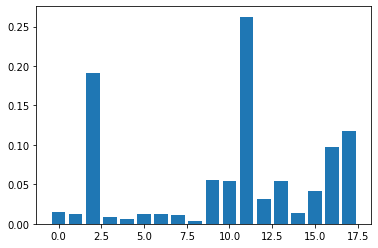

In [ ]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)

plt.show()

In [ ]:
sns.barplot(x = 'svm_coef',
            y = 'features_names',
            data = svm_coef_df)
 
# Show the plot
plt.show()

In [ ]:
#Shown above, feature 11 is ACC_Z range

In [ ]:


#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 97.91666666666666


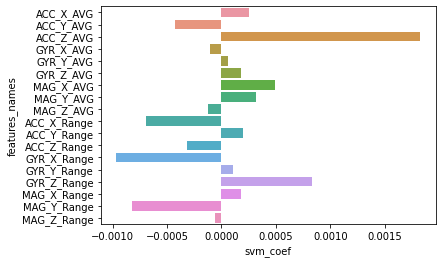

In [ ]:
features_names = list()
for i in range(len(squats_df.columns)):
    features_names.append(squats_df.columns[i])
svm_coef = list()
for i in range(len(clf.coef_[0])):
    svm_coef.append(clf.coef_[0][i])
svm_coef_df = pd.DataFrame(
    {'svm_coef': svm_coef,
     'features_names': features_names
    }) 
sns.barplot(x = 'svm_coef',
            y = 'features_names',
            data = svm_coef_df)
 
# Show the plot
plt.show()

In [ ]:
#Neural Networks
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=18, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 36.2269 - accuracy: 0.5263
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 19.9753 - accuracy: 0.7105
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 12.7763 - accuracy: 0.7684
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 8.0165 - accuracy: 0.7895
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 5.4276 - accuracy: 0.8211
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 3.6091 - accuracy: 0.8526
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 2.6365 - accuracy: 0.8842
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 2.0565 - accuracy: 0.8842
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 1.4720 - accuracy: 0.9158
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.8377 - accuracy: 0.9316
Epoch 

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2/2 [==============================] - 0s 6ms/step - loss: 3.8242 - accuracy: 0.9583
Accuracy: 95.83


In [5]:
models = ["KNN", "Logistic Regression", "Decision Trees", "Random Forest", "SVM", "Neural Networks"]

In [3]:
Accuracy = [96.0, 97.9, 97.9, 100, 97.9, 95.8]

In [6]:
df_acc = pd.DataFrame(
    {'models': models,
     'Accuracy': Accuracy
    }) 

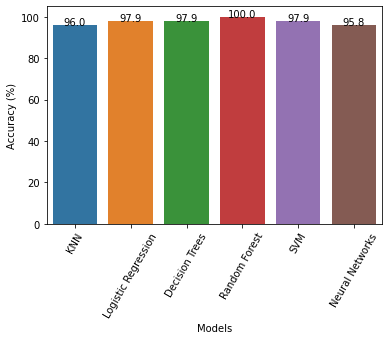

In [7]:
acc_ml =sns.barplot(x = 'models',
            y = 'Accuracy',
            data = df_acc)
 
# Show the plot
for index, row in df_acc.iterrows():
    acc_ml.text(row.name,row.Accuracy, round(row.Accuracy,2), color='black', ha="center")
acc_ml.set_xticklabels(acc_ml.get_xticklabels(),rotation=60)
acc_ml.set(xlabel='Models', ylabel='Accuracy (%)')
plt.show()